In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr

In [82]:
fft_df=pd.read_csv("fft_8_synth.csv", delimiter=";")

In [83]:
fft_df.head()

,Unnamed: 0,Benchmark,regions,trainingIterations,testIterations,totalPos,totalNeg,fp_rate,fn_rate,fn_percerr_mean,...,fn_percerr_2.5percentile,fn_percerr_10percentile,fn_percerr_firstquartile,fn_percerr_median,fn_percerr_thirdquartile,fn_percerr_90percentile,fn_percerr_97.5percentile,fn_percerr_99percentile,fn_percerr_min,fn_percerr_max
0,0,NaN,16.0,800.0,50000.0,50000.0,123983864.0,49.182,87.845265,32.294691,...,0.000013,0.000055,0.001081,0.126385,6.068439,26.198904,119.690454,327.164622,0.000006,3.611268e+05
1,1,NaN,16.0,1600.0,50000.0,50000.0,124072618.0,31.634,87.921646,24.227858,...,0.000013,0.000056,0.001091,0.128032,6.285896,26.345019,122.483130,316.895652,0.000006,1.281806e+05
2,2,NaN,16.0,3200.0,50000.0,50000.0,124054613.0,18.616,87.894021,17.466363,...,0.000013,0.000054,0.001052,0.122559,6.201703,25.530246,107.936375,258.206002,0.000006,4.263520e+04
3,3,NaN,16.0,6400.0,50000.0,50000.0,124072257.0,9.814,87.895101,130.825520,...,0.000013,0.000054,0.001070,0.126336,6.284278,26.616150,112.483168,281.117105,0.000006,2.036349e+06
4,4,NaN,16.0,12800.0,50000.0,50000.0,124065793.0,4.736,87.924078,26.633015,...,0.000013,0.000057,0.001124,0.131785,6.452663,27.751750,127.308583,321.136997,0.000006,2.280454e+05


In [84]:
fft_df.dropna(axis=1, inplace=True)

In [85]:
fft_df.drop(fft_df[fft_df['regions'] != 16 ].index, inplace=True)

In [86]:
ann_df=pd.read_csv("ann_synth.csv", delimiter=";")

In [87]:
ann_df.dropna(axis=1, inplace=True)
ann_df.drop(ann_df[ann_df['regions'] != 16 ].index, inplace=True)

In [88]:
gauss_df=pd.read_csv("gauss_synth.csv", delimiter=";")

In [89]:
gauss_df.dropna(axis=1, inplace=True)
gauss_df.drop(gauss_df[gauss_df['regions'] != 16 ].index, inplace=True)

In [103]:
latnav_df=pd.read_csv("latnav_2_synth.csv", delimiter=";")

In [104]:
latnav_df.dropna(axis=1, inplace=True)
latnav_df.drop(latnav_df[latnav_df['regions'] != 16 ].index, inplace=True)

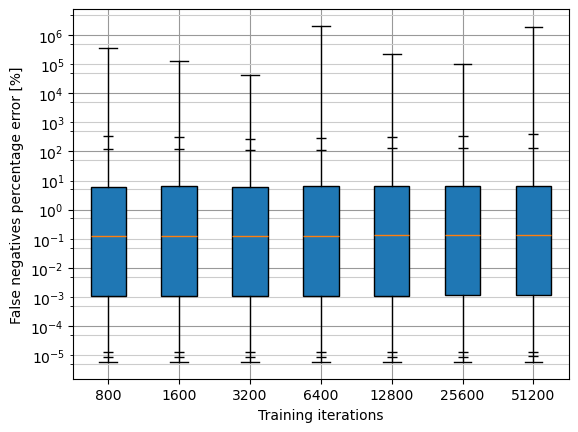

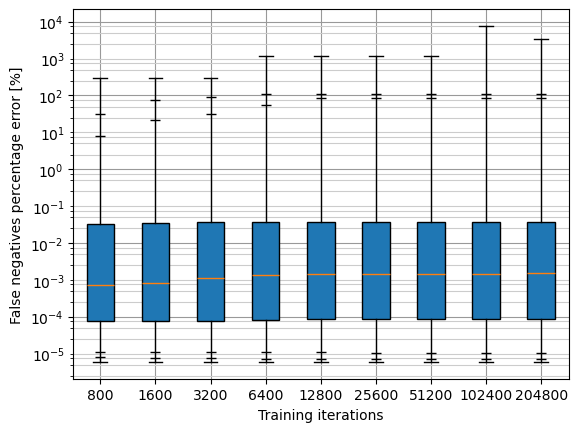

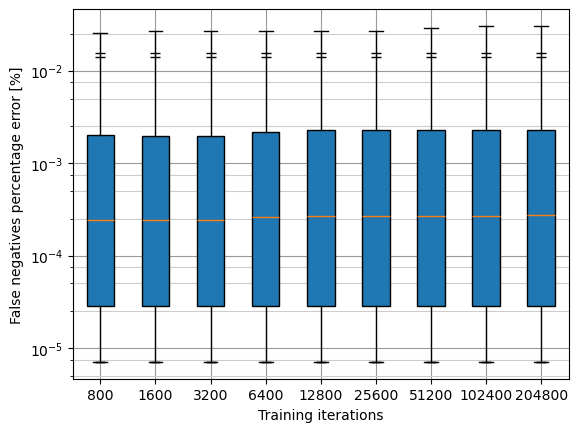

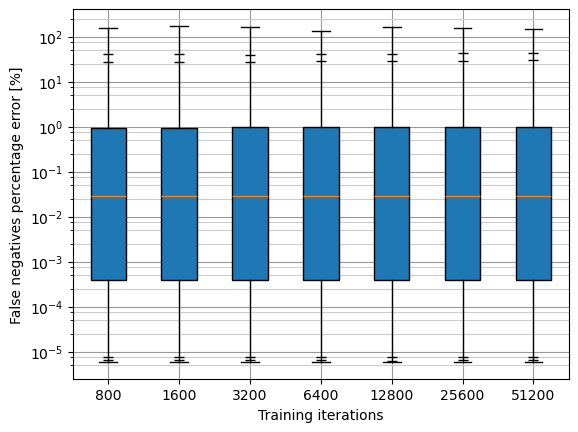

In [101]:

fullminorticksubs=(0.25, 0.5, 0.75, 1)
liteminorticksubs=(0.5, 1)

dataframes=[fft_df, latnav_df, ann_df, gauss_df]
minorticksubs=[liteminorticksubs, fullminorticksubs, fullminorticksubs, fullminorticksubs]
for df, mtsubs in zip(dataframes, minorticksubs):
    fig, ax = plt.subplots()
    
    plt.grid(visible=True, which='major', color='0.6')
    plt.grid(axis= 'y', visible=True, which='minor', color='0.8')
    ax.set_yscale('log')

    boxes = []
    for ti in range(len(df)):
        boxes.append({
            'label' : int(df["trainingIterations"].iloc[ti]),
            'whislo': df["fn_percerr_min"].iloc[ti],    # Bottom whisker position
            'q1'    : df["fn_percerr_firstquartile"].iloc[ti],    # First quartile (25th percentile)
            'med'   : df["fn_percerr_median"].iloc[ti],    # Median         (50th percentile)
            'q3'    : df["fn_percerr_thirdquartile"].iloc[ti],    # Third quartile (75th percentile)
            'whishi': df["fn_percerr_max"].iloc[ti],    # Top whisker position
            'fliers': [df["fn_percerr_1percentile"].iloc[ti], df["fn_percerr_2.5percentile"].iloc[ti], df["fn_percerr_97.5percentile"].iloc[ti], df["fn_percerr_99percentile"].iloc[ti]],       #outliers interface used as marker for custom percentiles
            'mean'  : df["fn_percerr_mean"].iloc[ti]
        })
    
    ax.bxp(boxes, showfliers=True, flierprops=dict(marker='_', markerfacecolor='black', markersize=7,
                      linestyle='none'),  showmeans=False, patch_artist=True)

    ax.set_ylabel("False negatives percentage error [%]")
    ax.set_xlabel("Training iterations")
    
    ax.yaxis.set_minor_locator(tkr.LogLocator(base = 10, numticks=12, subs=mtsubs)) 
    plt.show()

In [106]:
latnav_df.drop(latnav_df[latnav_df['trainingIterations'] > 51200 ].index, inplace=True)

In [107]:
ann_df.drop(ann_df[ann_df['trainingIterations'] > 51200 ].index, inplace=True)

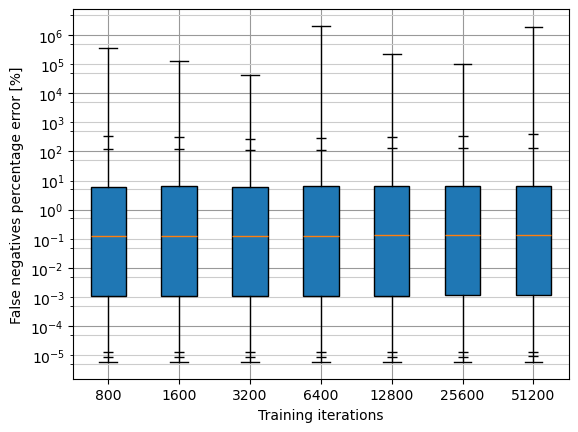

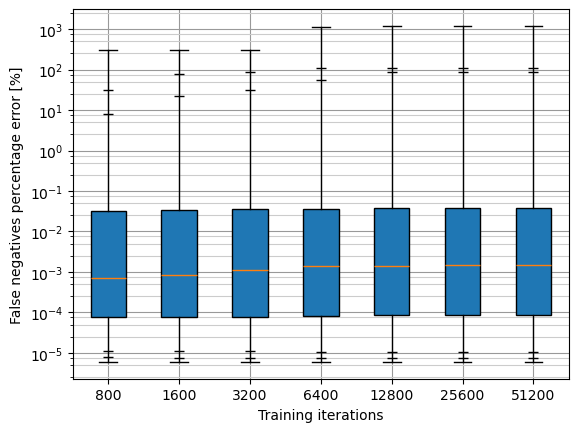

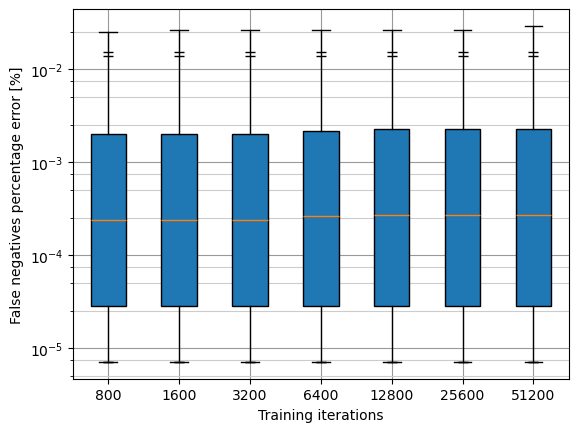

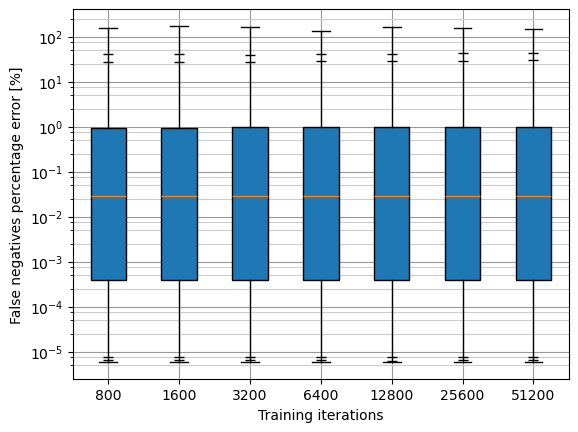

In [108]:

fullminorticksubs=(0.25, 0.5, 0.75, 1)
liteminorticksubs=(0.5, 1)

dataframes=[fft_df, latnav_df, ann_df, gauss_df]
minorticksubs=[liteminorticksubs, fullminorticksubs, fullminorticksubs, fullminorticksubs]
for df, mtsubs in zip(dataframes, minorticksubs):
    fig, ax = plt.subplots()
    
    plt.grid(visible=True, which='major', color='0.6')
    plt.grid(axis= 'y', visible=True, which='minor', color='0.8')
    ax.set_yscale('log')

    boxes = []
    for ti in range(len(df)):
        boxes.append({
            'label' : int(df["trainingIterations"].iloc[ti]),
            'whislo': df["fn_percerr_min"].iloc[ti],    # Bottom whisker position
            'q1'    : df["fn_percerr_firstquartile"].iloc[ti],    # First quartile (25th percentile)
            'med'   : df["fn_percerr_median"].iloc[ti],    # Median         (50th percentile)
            'q3'    : df["fn_percerr_thirdquartile"].iloc[ti],    # Third quartile (75th percentile)
            'whishi': df["fn_percerr_max"].iloc[ti],    # Top whisker position
            'fliers': [df["fn_percerr_1percentile"].iloc[ti], df["fn_percerr_2.5percentile"].iloc[ti], df["fn_percerr_97.5percentile"].iloc[ti], df["fn_percerr_99percentile"].iloc[ti]],       #outliers interface used as marker for custom percentiles
            'mean'  : df["fn_percerr_mean"].iloc[ti]
        })
    
    ax.bxp(boxes, showfliers=True, flierprops=dict(marker='_', markerfacecolor='black', markersize=7,
                      linestyle='none'),  showmeans=False, patch_artist=True)

    ax.set_ylabel("False negatives percentage error [%]")
    ax.set_xlabel("Training iterations")
    
    ax.yaxis.set_minor_locator(tkr.LogLocator(base = 10, numticks=12, subs=mtsubs)) 
    plt.show()